In [ ]:
### bibliotecas base
import pandas as pd
import numpy as np
### bibliotecas para visualizacao de dados
import seaborn as sns
import matplotlib.pyplot as plt
### bibliotecas para estatística
import scipy.stats as stat

In [ ]:
!pip install pydataset --quiet ## instala a biblioteca
from pydataset import data ### biblioteca q contem diferentes datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 42.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
initiated datasets repo at: /root/.pydataset/


In [ ]:
###transformando o arquivo enem_2023.json em dataframe:
### pd.READ_JSON  (pd é do pandas)

df = pd.read_json('enem_2023.json')

###visualizar o dataframe por padrão 5 linhas)
### .HEAD
df.head()

,Linguagens,Ciências humanas,Ciências da natureza,Matemática,Redação,Sexo
0,585.669300,686.512178,390.482473,452.281333,546.371706,Homem
1,359.384608,642.084134,NaN,412.205207,741.825256,Mulher
2,622.732384,495.510719,443.183580,669.683401,684.515750,Homem
3,350.164605,602.041588,413.979810,676.608952,671.237114,Homem
4,384.093657,489.249140,609.758123,520.426698,744.375048,Homem


In [ ]:
###visualizar o dataframe por padrão 5 linhas)
### .HEAD
df.head(20)

,Linguagens,Ciências humanas,Ciências da natureza,Matemática,Redação,Sexo
0,585.669300,686.512178,390.482473,452.281333,546.371706,Homem
1,359.384608,642.084134,NaN,412.205207,741.825256,Mulher
2,622.732384,495.510719,443.183580,669.683401,684.515750,Homem
3,350.164605,602.041588,413.979810,676.608952,671.237114,Homem
4,384.093657,489.249140,609.758123,520.426698,744.375048,Homem
5,616.043360,502.007005,497.777935,615.902547,507.365147,Homem
6,511.897593,479.197660,469.023899,441.139103,541.979136,Mulher
7,377.439818,663.489624,556.239031,517.215575,635.424649,Mulher
8,597.462934,NaN,483.223740,509.043317,499.676936,Mulher
9,536.571398,594.007869,NaN,595.562778,270.839965,Mulher


In [ ]:
df.info() ### verificando quais colunas sao numéricas e quais categóricas.

#object= variáveis categóricas e float64= numéricas contínuas.

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Linguagens            897 non-null    float64
 1   Ciências humanas      936 non-null    float64
 2   Ciências da natureza  824 non-null    float64
 3   Matemática            924 non-null    float64
 4   Redação               860 non-null    float64
 5   Sexo                  1000 non-null   object 
dtypes: float64(5), object(1)
memory usage: 54.7+ KB


Considerando a base de dados de enem_2023.json responda as questões abaixo (os dados são fictícios).

Você é uma pesquisadora de um cursinho para estudantes que querem ingressar na universidade em 2025. Seu objetivo é retirar informações da base de dados do enem do ano anterior para alinhar melhor as estratégias do cursinho para cada estudante.
O dado possui 6 colunas, 5 delas representam as disciplinas do ENEM e uma o gênero das pessoas que fizeram a prova. No dado existe a representação de 1000 pessoas, sendo cada uma delas uma linha.

1. Qual das disciplinas tem a maior amplitude de nota?

In [ ]:
#criando um dataframe novo substituindo as notas NULL para 0

df1 = df.fillna(0)



In [ ]:
#visualizando
df1.head()

,Linguagens,Ciências humanas,Ciências da natureza,Matemática,Redação,Sexo
0,585.669300,686.512178,390.482473,452.281333,546.371706,Homem
1,359.384608,642.084134,0.000000,412.205207,741.825256,Mulher
2,622.732384,495.510719,443.183580,669.683401,684.515750,Homem
3,350.164605,602.041588,413.979810,676.608952,671.237114,Homem
4,384.093657,489.249140,609.758123,520.426698,744.375048,Homem


In [ ]:
# Calculando a amplitude das notas para as disciplinas selecionadas
disciplinas = ['Linguagens', 'Ciências humanas', 'Ciências da natureza', 'Matemática', 'Redação']
amplitude = df1[disciplinas].max() - df1[disciplinas].min()


# Exibindo a amplitude de cada disciplina
print("A disciplina com maior amplitude é Redação.")
amplitude.sort_values(ascending=False) #organizando do maior para o menor

A disciplina com maior amplitude é Redação.


,0
Redação,1000.000000
Matemática,807.877902
Linguagens,804.456317
Ciências da natureza,802.004568
Ciências humanas,763.919695


2. Qual é a média e a mediana para cada uma das disciplinas? (Lembre-se de remover todos os valores nulos quando considerar a mediana)

In [ ]:
#1°) Média e Mediana considerando os valores nulos = 0 (Me parece a maneira mais correta de analisar os dados)
#Média:
media_disciplinas  = df1[disciplinas].mean()  # média
media_disciplinas.sort_values(ascending=False) #organizando do maior para o menor

,0
Redação,548.493838
Matemática,495.232270
Ciências humanas,493.311575
Linguagens,461.528754
Ciências da natureza,411.436040


In [ ]:
#Mediana:
mediana_disciplinas  = df1[disciplinas].median()  # mediana
mediana_disciplinas #organizando do maior para o menor

,0
Linguagens,501.782864
Ciências humanas,517.579368
Ciências da natureza,478.853382
Matemática,527.787215
Redação,613.490219


In [ ]:
#2°) Média e Mediana removendo valores nulos

# Removendo todas as linhas com valores nulos
df_sem_nulos = df.dropna()
df_sem_nulos

,Linguagens,Ciências humanas,Ciências da natureza,Matemática,Redação,Sexo
0,585.669300,686.512178,390.482473,452.281333,546.371706,Homem
2,622.732384,495.510719,443.183580,669.683401,684.515750,Homem
3,350.164605,602.041588,413.979810,676.608952,671.237114,Homem
4,384.093657,489.249140,609.758123,520.426698,744.375048,Homem
5,616.043360,502.007005,497.777935,615.902547,507.365147,Homem
...,...,...,...,...,...,...
990,510.183170,549.132853,557.957321,494.758023,795.671459,Mulher
993,460.925597,382.509978,528.010191,531.189617,579.596477,Mulher
994,502.990616,552.407982,554.934948,485.703584,566.635561,Homem
996,457.755594,444.616952,542.028624,419.689692,715.984249,Mulher


In [ ]:
#Média:
media_disciplinas_2 = df_sem_nulos[disciplinas].mean()  # média
media_disciplinas_2.sort_values(ascending=False) #organizando do maior para o menor

,0
Redação,641.193123
Matemática,537.172480
Ciências humanas,528.351454
Linguagens,517.467162
Ciências da natureza,502.142101


In [ ]:
#Mediana:
mediana_disciplinas_2 = df_sem_nulos[disciplinas].median()  # mediana
mediana_disciplinas_2.sort_values(ascending=False) #organizando do maior para o menor

,0
Redação,639.602691
Matemática,532.961486
Ciências humanas,528.503263
Linguagens,517.128831
Ciências da natureza,502.935209


3. Considerando o curso de Ciência da Computação da UFPE, onde o peso cada uma das disciplinas ponderado:

a. Redação - 2

b. Matemática e suas Tecnologias - 4

c. Linguagens, Códigos e suas Tecnologias - 2

d. Ciências Humanas e suas Tecnologias - 1

e. Ciências da Natureza e suas Tecnologias - 1


Qual o desvio padrão e média das notas dos 500 estudantes mais bem colocados considerando esses pesos?

In [ ]:
# Definindo os pesos
pesos = {
    'Redação': 2,
    'Matemática': 4,
    'Linguagens': 2,
    'Ciências humanas': 1,
    'Ciências da natureza': 1
}

# Calcular a média ponderada de cada candidato/aluno:
df1['media_ponderada'] = (
    df1['Redação'] * pesos['Redação'] +
    df1['Matemática'] * pesos['Matemática'] +
    df1['Linguagens'] * pesos['Linguagens'] +
    df1['Ciências humanas'] * pesos['Ciências humanas'] +
    df1['Ciências da natureza'] * pesos['Ciências da natureza']
) / sum(pesos.values())

# Exibir o DataFrame com a nova coluna
df1.head()


,Linguagens,Ciências humanas,Ciências da natureza,Matemática,Redação,Sexo,media_ponderada
0,585.669300,686.512178,390.482473,452.281333,546.371706,Homem,515.020199
1,359.384608,642.084134,0.000000,412.205207,741.825256,Mulher,449.332469
2,622.732384,495.510719,443.183580,669.683401,684.515750,Homem,623.192417
3,350.164605,602.041588,413.979810,676.608952,671.237114,Homem,576.526064
4,384.093657,489.249140,609.758123,520.426698,744.375048,Homem,543.765146


In [ ]:
# Selecionar os 500 estudantes mais bem colocados
top_500 = df1.sort_values('media_ponderada', ascending=False).head(500)

# Exibir os 500 estudantes mais bem colocados
print("Os 500 estudantes mais bem colocados:")
top_500

Os 500 estudantes mais bem colocados:


,Linguagens,Ciências humanas,Ciências da natureza,Matemática,Redação,Sexo,media_ponderada
25,604.825455,447.532353,523.041011,727.181224,870.464077,Mulher,682.987732
824,533.812379,611.760520,494.994598,807.877902,697.570213,Não idenficado,680.103191
702,551.398112,637.818208,451.624683,803.769938,652.669636,Homem,671.265814
129,583.015454,434.261543,588.516699,687.621711,852.273821,Mulher,664.384364
60,498.394660,668.355060,457.371963,760.136151,711.458481,Mulher,658.597791
...,...,...,...,...,...,...,...
456,497.837206,502.975922,451.586088,527.494074,520.878879,Mulher,510.197048
297,583.260442,465.428564,664.065434,361.210759,678.831065,Mulher,509.852005
259,588.932723,494.175399,0.000000,416.294315,879.423754,Mulher,509.606561
750,488.992833,551.149739,0.000000,483.604542,816.056382,Homem,509.566634


In [ ]:
# Calculando média dos 500 primeiros
media_500= top_500['media_ponderada'].mean()
media_500


561.879106490385

In [ ]:
# Calculando desvio padrão dos 500 primeiros
desvio_padrao_500 = top_500['media_ponderada'].std()
desvio_padrao_500

35.994266397324274

4. Se todos esses estudantes aplicassem para ciência da computação e existem apenas 40 vagas, qual seria a variância e média da nota dos estudantes que entraram no curso de ciência da computação?


In [ ]:
#Considerando os 500 estudantes mais bem colocados:

# Selecionar, dos 500 estudantes , os 40 mais bem colocados ordenados do maior para o menor:
quarenta_vagas = top_500.head(40).sort_values('media_ponderada', ascending=False)

quarenta_vagas



,Linguagens,Ciências humanas,Ciências da natureza,Matemática,Redação,Sexo,media_ponderada
25,604.825455,447.532353,523.041011,727.181224,870.464077,Mulher,682.987732
824,533.812379,611.760520,494.994598,807.877902,697.570213,Não idenficado,680.103191
702,551.398112,637.818208,451.624683,803.769938,652.669636,Homem,671.265814
129,583.015454,434.261543,588.516699,687.621711,852.273821,Mulher,664.384364
60,498.394660,668.355060,457.371963,760.136151,711.458481,Mulher,658.597791
880,671.524266,590.780179,546.595272,571.607337,909.379934,Homem,658.561320
376,364.096042,582.024626,523.764760,749.912621,872.188740,Não idenficado,657.800943
989,462.051713,512.986241,506.405210,787.771672,692.814673,Homem,648.021091
694,497.493880,609.839007,528.413513,737.175029,693.739043,Mulher,646.941848
965,660.913894,613.882660,433.935910,580.908082,881.465882,Mulher,645.621045


In [ ]:
#média dos 40 alunos com maiores notas:
media_40 = quarenta_vagas['media_ponderada'].mean()
media_40

636.6827415075188

In [ ]:
#Variância dos 40 alunos com maiores notas:
variancia_40 = quarenta_vagas['media_ponderada'].var()
variancia_40

295.7675036004101

5. Qual o valor do teto do terceiro quartil para as disciplinas de matemática e linguagens?

In [ ]:
#Para notas nulas =0 (para mim, a interpretação mais correta seria essa, nulas=0)
q3_matematica_0 = np.ceil(df1['Matemática'].quantile(0.75))
q3_linguagens_0 = np.ceil(df1['Linguagens'].quantile(0.75))


# Exibir os resultados
print("O teto do terceiro quartil para Matemática é:", q3_matematica_0)
print("O teto do terceiro quartil para Linguagens é:", q3_linguagens_0)


O teto do terceiro quartil para Matemática é: 587.0
O teto do terceiro quartil para Linguagens é: 565.0


In [ ]:
#Para notas nulas removidas
q3_matematica_sem_nulos = np.ceil(df_sem_nulos['Matemática'].quantile(0.75))
q3_linguagens_sem_nulos = np.ceil(df_sem_nulos['Linguagens'].quantile(0.75))


# Exibir os resultados
print("O teto do terceiro quartil para Matemática é:", q3_matematica_sem_nulos)
print("O teto do terceiro quartil para Linguagens é:", q3_linguagens_sem_nulos)

O teto do terceiro quartil para Matemática é: 592.0
O teto do terceiro quartil para Linguagens é: 573.0


6. Faça o histograma de Redação e Linguagens, de 20 em 20 pontos. Podemos dizer que são histogramas simétricos, justifique e classifique
se não assimétricas?

(array([140.,   0.,   0.,   0.,   0.,   2.,   3.,   8.,  30.,  56., 101.,
        123., 144., 143., 108.,  73.,  33.,  25.,   9.,   2.]),
 array([   0.,   50.,  100.,  150.,  200.,  250.,  300.,  350.,  400.,
         450.,  500.,  550.,  600.,  650.,  700.,  750.,  800.,  850.,
         900.,  950., 1000.]),
 <BarContainer object of 20 artists>)

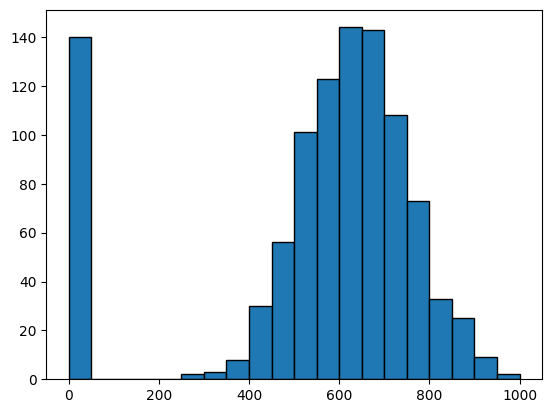

In [ ]:
 #Foi considerado valores nulos = 0 pois como se trata de notas, se está vazio/sem nota, então é 0.

  #com nulos=0
 plt.hist(df1['Redação'], bins = 20, edgecolor = 'black')

 #histograma é assimétrico à direita, devido alunos com nota 0.

(array([ 1.,  3.,  2.,  8., 13., 23., 26., 45., 41., 53., 62., 63., 57.,
        49., 30., 25., 17., 11., 12.,  7.]),
 array([290.30860817, 322.35844151, 354.40827485, 386.45810819,
        418.50794153, 450.55777487, 482.60760822, 514.65744156,
        546.7072749 , 578.75710824, 610.80694158, 642.85677492,
        674.90660826, 706.95644161, 739.00627495, 771.05610829,
        803.10594163, 835.15577497, 867.20560831, 899.25544165,
        931.30527499]),
 <BarContainer object of 20 artists>)

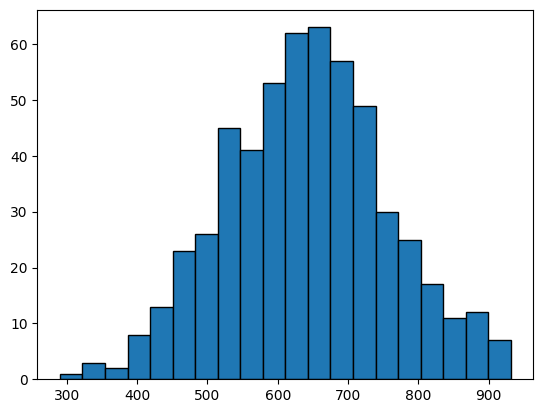

In [ ]:
 #com nulos deletados:

 plt.hist(df_sem_nulos['Redação'], bins = 20, edgecolor = 'black')

 #histograma é simétrico pois os dados estão distribuídos mais ou menos de forma igualitária em torno do eixo central que está entre 600-700.

(array([103.,   0.,   0.,   0.,   0.,   0.,   0.,   8.,  26.,  48.,  86.,
        157., 163., 157., 129.,  61.,  41.,  15.,   5.,   1.]),
 array([  0.        ,  40.22281586,  80.44563172, 120.66844758,
        160.89126344, 201.1140793 , 241.33689516, 281.55971102,
        321.78252688, 362.00534274, 402.2281586 , 442.45097446,
        482.67379032, 522.89660618, 563.11942203, 603.34223789,
        643.56505375, 683.78786961, 724.01068547, 764.23350133,
        804.45631719]),
 <BarContainer object of 20 artists>)

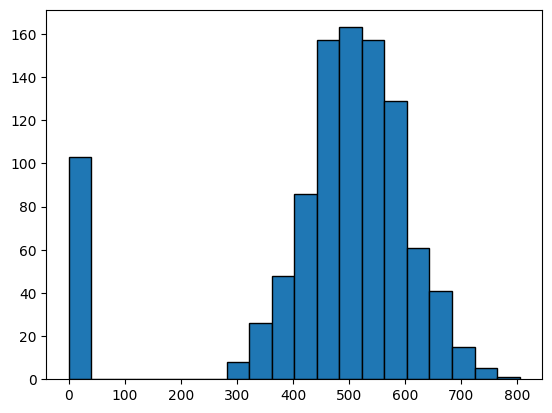

In [ ]:
#com nulos=0
plt.hist(df1['Linguagens'], bins = 20, edgecolor = 'black')

#histograma é assimétrico à direita, devido alunos com nota 0.

(array([ 4.,  7.,  6., 17., 24., 34., 58., 60., 76., 67., 54., 55., 33.,
        21., 12., 11.,  7.,  1.,  0.,  1.]),
 array([287.        , 312.87281586, 338.74563172, 364.61844758,
        390.49126344, 416.3640793 , 442.23689516, 468.10971102,
        493.98252688, 519.85534274, 545.7281586 , 571.60097446,
        597.47379032, 623.34660618, 649.21942203, 675.09223789,
        700.96505375, 726.83786961, 752.71068547, 778.58350133,
        804.45631719]),
 <BarContainer object of 20 artists>)

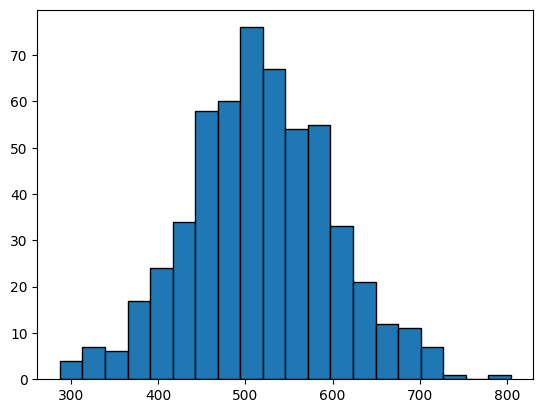

In [ ]:
#com nulos deletados
plt.hist(df_sem_nulos['Linguagens'], bins = 20, edgecolor = 'black')

#histograma assimétrico à direita, com cauda mais longa à direita indicando dados com valores mais baixos.

7. Agora coloque um range fixo de 0 até 1000, você ainda tem a mesma opinião quanto a simetria? [plt.hist(dado, bins=_, range=[0, 1000]

(array([140.,   0.,   0.,   0.,   0.,   2.,   3.,   8.,  30.,  56., 101.,
        123., 144., 143., 108.,  73.,  33.,  25.,   9.,   2.]),
 array([   0.,   50.,  100.,  150.,  200.,  250.,  300.,  350.,  400.,
         450.,  500.,  550.,  600.,  650.,  700.,  750.,  800.,  850.,
         900.,  950., 1000.]),
 <BarContainer object of 20 artists>)

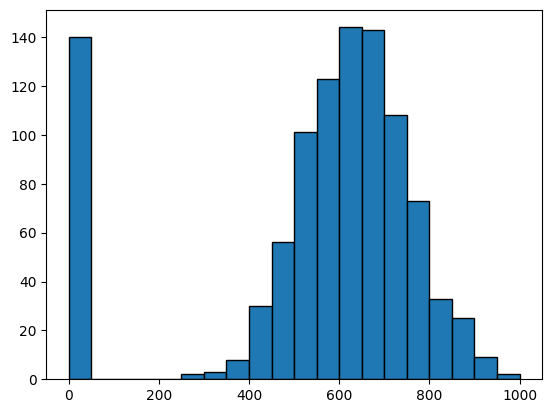

In [ ]:
# nulos=0
plt.hist(df1['Redação'], bins=20, edgecolor='black', range=[0, 1000])

# histograma continua assimétrico à direita, devido aos alunos com nota 0.

(array([  0.,   0.,   0.,   0.,   0.,   1.,   3.,   4.,  17.,  34.,  66.,
         72.,  93., 100.,  64.,  45.,  22.,  20.,   7.,   0.]),
 array([   0.,   50.,  100.,  150.,  200.,  250.,  300.,  350.,  400.,
         450.,  500.,  550.,  600.,  650.,  700.,  750.,  800.,  850.,
         900.,  950., 1000.]),
 <BarContainer object of 20 artists>)

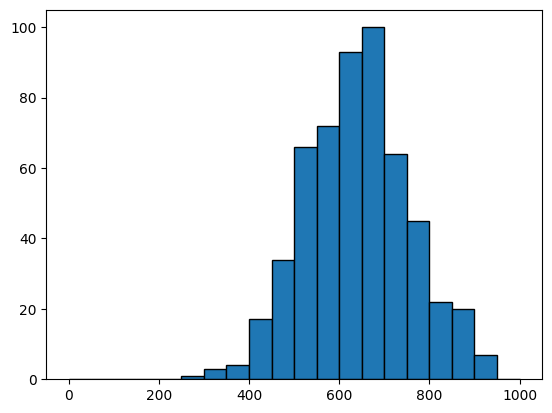

In [ ]:
# nulos deletados:
plt.hist(df_sem_nulos['Redação'], bins=20, edgecolor='black', range=[0, 1000])

#histograma continua simétrico pois os dados estão distribuídos mais ou menos de forma igualitária em torno do eixo central que está entre 600-700.

(array([103.,   0.,   0.,   0.,   0.,   2.,  20.,  55., 116., 198., 205.,
        167.,  81.,  40.,  11.,   1.,   1.,   0.,   0.,   0.]),
 array([   0.,   50.,  100.,  150.,  200.,  250.,  300.,  350.,  400.,
         450.,  500.,  550.,  600.,  650.,  700.,  750.,  800.,  850.,
         900.,  950., 1000.]),
 <BarContainer object of 20 artists>)

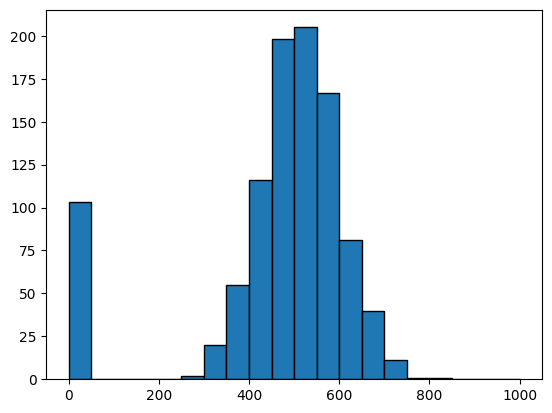

In [ ]:
# nulos=0
plt.hist(df1['Linguagens'], bins=20, edgecolor='black', range=[0, 1000])

# histograma continua assimétrico à direita, devido aos alunos com nota 0.

(array([  0.,   0.,   0.,   0.,   0.,   1.,  11.,  28.,  70., 116., 140.,
         99.,  51.,  23.,   8.,   0.,   1.,   0.,   0.,   0.]),
 array([   0.,   50.,  100.,  150.,  200.,  250.,  300.,  350.,  400.,
         450.,  500.,  550.,  600.,  650.,  700.,  750.,  800.,  850.,
         900.,  950., 1000.]),
 <BarContainer object of 20 artists>)

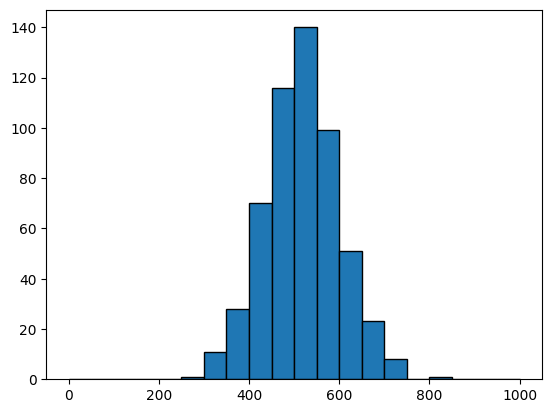

In [ ]:
# nulos deletados:
plt.hist(df_sem_nulos['Linguagens'], bins=20, edgecolor='black', range=[0, 1000])

# este histograma já apresenta uma forma mais simétrica , com valores mais ou menos equilibrado em torno do eixo central entre 500-550. caudas direita e esquerda semelhantes.


8. Faça um boxplot do quartil de todas as disciplinas de ciências da natureza e redação. É possível enxergar outliers? Utilize o método IQR.

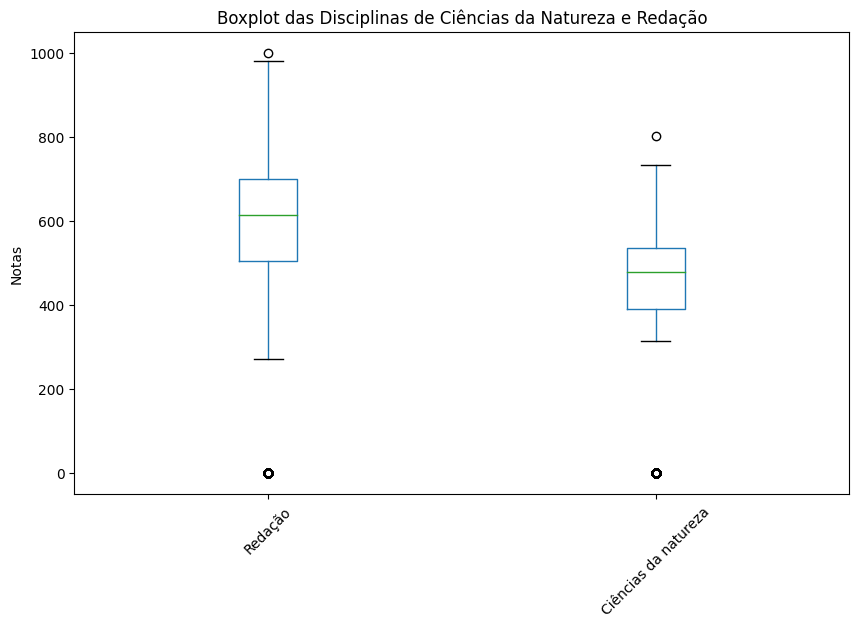

In [ ]:
#Com nulos=0:
# Selecionar as colunas desejadas

disciplinas_0= df1[['Redação', 'Ciências da natureza']]

# Criar o boxplot
plt.figure(figsize=(10, 6))
boxplot = disciplinas_0.boxplot(grid=False)

# Adicionar título e rótulos
plt.title('Boxplot das Disciplinas de Ciências da Natureza e Redação')
plt.ylabel('Notas')
plt.xticks(rotation=45)

# Exibir o boxplot
plt.show()

In [ ]:
# Cálculo do IQR e identificação de outliers
Q1 = disciplinas_0.quantile(0.25)
Q3 = disciplinas_0.quantile(0.75)
IQR = Q3 - Q1
IQR



,0
Redação,194.126996
Ciências da natureza,145.679488


In [ ]:
# Definindo limites para outliers
limite_inferior_0 = Q1 - 1.5 * IQR
limite_inferior_0
limite_superior_0 = Q3 + 1.5 * IQR
limite_superior_0



,0
Redação,991.163391
Ciências da natureza,755.244048


In [ ]:
# Identificar outliers
outliers_0 = (disciplinas_0 < limite_inferior_0) | (disciplinas_0 > limite_superior_0)
outliers_0

# Exibir os outliers
for column in disciplinas_0.columns:
    column_outliers_0 = disciplinas_0[column][outliers_0[column]]
    if not column_outliers_0.empty:
        print(f"Outliers identificados em {column}:")
        print(column_outliers_0.dropna())

Outliers identificados em Redação:
12        0.0
17        0.0
48        0.0
49        0.0
50        0.0
72        0.0
93        0.0
97        0.0
101       0.0
115       0.0
118       0.0
122       0.0
124       0.0
127       0.0
134       0.0
136       0.0
148       0.0
157       0.0
165       0.0
166       0.0
173       0.0
176       0.0
177       0.0
179       0.0
180       0.0
181       0.0
189       0.0
191       0.0
220       0.0
223       0.0
233       0.0
242       0.0
246       0.0
249       0.0
253       0.0
256       0.0
265       0.0
284       0.0
301       0.0
304       0.0
308       0.0
309       0.0
313       0.0
315       0.0
320       0.0
335       0.0
340       0.0
350       0.0
361       0.0
368       0.0
369       0.0
374       0.0
388       0.0
389       0.0
413       0.0
414       0.0
417       0.0
418       0.0
426       0.0
438       0.0
446       0.0
451       0.0
454       0.0
457       0.0
458       0.0
467       0.0
483       0.0
502       0.0
512       0.0

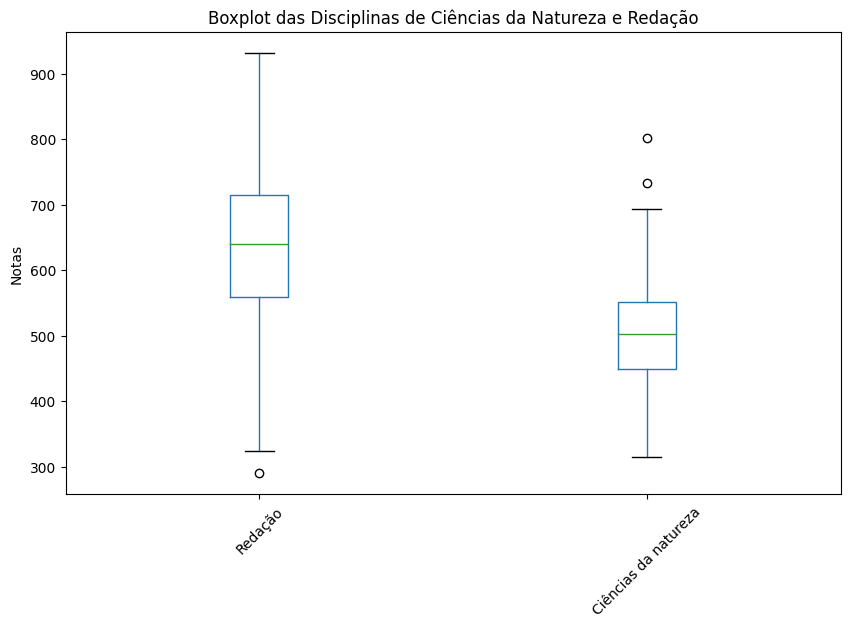

In [ ]:
#Com nulos removidos:
# Selecionar as colunas desejadas

disciplinas_sem_null= df_sem_nulos[['Redação', 'Ciências da natureza']]

# Criar o boxplot
plt.figure(figsize=(10, 6))
boxplot = disciplinas_sem_null.boxplot(grid=False)

# Adicionar título e rótulos
plt.title('Boxplot das Disciplinas de Ciências da Natureza e Redação')
plt.ylabel('Notas')
plt.xticks(rotation=45)

# Exibir o boxplot
plt.show()

In [ ]:
# Cálculo do IQR e identificação de outliers
Q1 = disciplinas_sem_null.quantile(0.25)
Q3 = disciplinas_sem_null.quantile(0.75)
IQR = Q3 - Q1
IQR

,0
Redação,157.025135
Ciências da natureza,102.262400


In [ ]:
# Definindo limites para outliers
limite_inferior_sem_null = Q1 - 1.5 * IQR
limite_inferior_sem_null
limite_superior_sem_null = Q3 + 1.5 * IQR
limite_superior_sem_null


,0
Redação,951.087795
Ciências da natureza,705.654136


In [ ]:
# Identificar outliers
outliers_sem_null = (disciplinas_sem_null < limite_inferior_sem_null) | (disciplinas_sem_null > limite_superior_sem_null)
outliers_sem_null

# Exibir os outliers
for column in disciplinas_sem_null.columns:
    column_outliers_sem_null = disciplinas_sem_null[column][outliers_sem_null[column]]
    if not column_outliers_sem_null.empty:
        print(f"Outliers identificados em {column}:")
        print(column_outliers_sem_null.dropna())

Outliers identificados em Redação:
545    290.308608
Name: Redação, dtype: float64
Outliers identificados em Ciências da natureza:
325    802.004568
482    732.502964
Name: Ciências da natureza, dtype: float64


9. Remova todos os outliers e verifique se eles são passíveis de alterar a média nacional significativamente? (considere significativamente um valor acima de 5%)

In [ ]:
#nulos =0:
# Criar uma cópia do DataFrame original para evitar alterações no original
disciplinas_0_sem_out = disciplinas_0.copy()

# Remover outliers para cada coluna
for column in disciplinas_0.columns:
    # Filtrar o DataFrame para manter apenas os valores que não são outliers
    disciplinas_0_sem_out = disciplinas_0_sem_out[~outliers_0[column]]

# Exibir o DataFrame resultante sem outliers
print(disciplinas_0_sem_out)

        Redação  Ciências da natureza
0    546.371706            390.482473
2    684.515750            443.183580
3    671.237114            413.979810
4    744.375048            609.758123
5    507.365147            497.777935
..          ...                   ...
993  579.596477            528.010191
994  566.635561            554.934948
996  715.984249            542.028624
997  798.408655            508.034658
998  593.392939            414.167228

[705 rows x 2 columns]


<ipython-input-97-383a01d97727>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  disciplinas_0_sem_out = disciplinas_0_sem_out[~outliers_0[column]]


In [ ]:
disciplinas_0_sem_out

,Redação,Ciências da natureza
0,546.371706,390.482473
2,684.515750,443.183580
3,671.237114,413.979810
4,744.375048,609.758123
5,507.365147,497.777935
...,...,...
993,579.596477,528.010191
994,566.635561,554.934948
996,715.984249,542.028624
997,798.408655,508.034658


In [ ]:
# Calcular média para Redação com outliers:
media_redacao_0_com_out = disciplinas_0["Redação"].mean()
print(f"Média de Redação (com outliers): {media_redacao_0_com_out}")

Média de Redação (com outliers): 548.493837579845


In [ ]:
# Calcular a nova média para Redação sem outliers:
media_redacao_0_sem_out = disciplinas_0_sem_out["Redação"].mean()
print(f"Média de Redação (sem outliers): {media_redacao_0_sem_out}")

Média de Redação (sem outliers): 637.96633338318


In [ ]:
# Calcular a diferença percentual
diferenca_percentual_red_0 = ((media_redacao_0_sem_out - media_redacao_0_com_out) / media_redacao_0_com_out) * 100
diferenca_percentual_red_0

#A diferença percentual é significativa pois está acima de 5%.

16.312397637523194

In [ ]:
# Calcular média para Ciências da natureza com outliers:
media_cien_0_com_out = disciplinas_0["Ciências da natureza"].mean()
print(f"Média de Ciências da natureza (com outliers): {media_cien_0_com_out}")

Média de Ciências da natureza (com outliers): 411.43604026755935


In [ ]:
# Calcular a nova média para Redação sem outliers:
media_cien_0_sem_out = disciplinas_0_sem_out["Ciências da natureza"].mean()
print(f"Média de Ciências da natureza (sem outliers): {media_cien_0_sem_out}")

Média de Ciências da natureza (sem outliers): 501.39269754373544


In [ ]:
# Calcular a diferença percentual
diferenca_percentual_cien_0 = ((media_cien_0_sem_out - media_cien_0_com_out) / media_cien_0_com_out) * 100
diferenca_percentual_cien_0

#A diferença percentual é significativa pois está acima de 5%.

21.864068402388067

In [ ]:
#nulos deletados:
# Criar uma cópia do DataFrame original para evitar alterações no original
disciplinas_sem_null_sem_out = disciplinas_sem_null.copy()

# Remover outliers para cada coluna
for column in disciplinas_sem_null.columns:
    # Filtrar o DataFrame para manter apenas os valores que não são outliers
    disciplinas_sem_null_sem_out = disciplinas_sem_null_sem_out[~outliers_sem_null[column]]

# Exibir o DataFrame resultante sem outliers
print(disciplinas_sem_null_sem_out)

        Redação  Ciências da natureza
0    546.371706            390.482473
2    684.515750            443.183580
3    671.237114            413.979810
4    744.375048            609.758123
5    507.365147            497.777935
..          ...                   ...
990  795.671459            557.957321
993  579.596477            528.010191
994  566.635561            554.934948
996  715.984249            542.028624
998  593.392939            414.167228

[545 rows x 2 columns]


<ipython-input-107-f12cdbd92884>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  disciplinas_sem_null_sem_out = disciplinas_sem_null_sem_out[~outliers_sem_null[column]]


In [ ]:
disciplinas_sem_null_sem_out

,Redação,Ciências da natureza
0,546.371706,390.482473
2,684.515750,443.183580
3,671.237114,413.979810
4,744.375048,609.758123
5,507.365147,497.777935
...,...,...
990,795.671459,557.957321
993,579.596477,528.010191
994,566.635561,554.934948
996,715.984249,542.028624


In [ ]:
# Calcular média para Redação com outliers:
media_redacao_sem_null_com_out = disciplinas_sem_null["Redação"].mean()
print(f"Média de Redação (com outliers): {media_redacao_sem_null_com_out}")

Média de Redação (com outliers): 641.1931234629293


In [ ]:
# Calcular a nova média para Redação
media_redacao_sem_null_sem_out = disciplinas_sem_null_sem_out["Redação"].mean()
print(f"Média de Redação (sem outliers): {media_redacao_sem_null_sem_out}")

Média de Redação (sem outliers): 641.5931969214411


In [ ]:
# Calcular a diferença percentual
diferenca_percentual_red_sem_null = ((media_redacao_sem_null_sem_out - media_redacao_sem_null_com_out) / media_redacao_sem_null_com_out) * 100
diferenca_percentual_red_sem_null

#A diferença percentual é muito pequena, não sendo capaz de alterar a média significativamente.

0.062395157382703924

In [ ]:
# Calcular média para Ciências da natureza com outliers:
media_cien_sem_null_com_out = disciplinas_sem_null["Ciências da natureza"].mean()
print(f"Média de Ciências da natureza (com outliers): {media_cien_sem_null_com_out}")

Média de Ciências da natureza (com outliers): 502.1421008280391


In [ ]:
# Calcular a nova média para Ciências da natureza
media_cien_sem_null_sem_out = disciplinas_sem_null_sem_out["Ciências da natureza"].mean()
print(f"Média de Ciências da natureza (sem outliers): {media_cien_sem_null_sem_out}")

Média de Ciências da natureza (sem outliers): 501.0517167751331


In [ ]:
# Calcular a diferença percentual
diferenca_percentual_cien_sem_null = (( media_cien_sem_null_com_out - media_cien_sem_null_sem_out) / media_cien_sem_null_com_out) * 100
diferenca_percentual_cien_sem_null

#A diferença percentual é muito pequena, não sendo capaz de alterar a média significativamente.

0.21714651113856073

10. Considerando valores nulos, tente encontrar qual seria a melhor medida de tendência que pode substituir as notas nulas. Média, moda ou mediana? Substitua o valor por todos os três e diga qual delas altera menos a média geral e o desvio padrão.

In [ ]:
#Será usado dataframe original com valores nulos

df_com_nulos = df.copy()
df_com_nulos

disciplinas_com_nulos = df_com_nulos[['Redação', 'Ciências da natureza']]
disciplinas_com_nulos

Média de Redação (com nulos): 637.7835320695872
Moda de Redação (com nulos): 270.8399648605
Mediana de Redação (com nulos): 635.27397319435


In [ ]:
disciplinas_com_nulos

,Redação,Ciências da natureza
0,546.371706,390.482473
1,741.825256,NaN
2,684.515750,443.183580
3,671.237114,413.979810
4,744.375048,609.758123
...,...,...
995,NaN,511.347833
996,715.984249,542.028624
997,798.408655,508.034658
998,593.392939,414.167228


In [ ]:
#Disciplina: Redação
# Calcular médias, modas e medianas
media_redacao_com_nulos = disciplinas_com_nulos["Redação"].mean()
moda_redacao_com_nulos = disciplinas_com_nulos["Redação"].mode()[0]  # Pega a primeira moda
mediana_redacao_com_nulos = disciplinas_com_nulos["Redação"].median()

# Calcular o desvio padrão da disciplina de Redação, ignorando valores nulos
desvio_padrao_redacao = disciplinas_com_nulos["Redação"].std()

print(f"Média de Redação (com nulos): {media_redacao_com_nulos}")
print(f"Moda de Redação (com nulos): {moda_redacao_com_nulos}")
print(f"Mediana de Redação (com nulos): {mediana_redacao_com_nulos}")
print(f"Desvio padrão de Redação (com nulos): {desvio_padrao_redacao}")

Média de Redação (com nulos): 637.7835320695872
Moda de Redação (com nulos): 270.8399648605
Mediana de Redação (com nulos): 635.27397319435
Desvio padrão de Redação (com nulos): 115.33997244479161


In [ ]:
# Substituindo média:
disciplinas_com_nulos_red_media = disciplinas_com_nulos["Redação"].fillna(media_redacao_com_nulos)
disciplinas_com_nulos_red_media


,Redação
0,546.371706
1,741.825256
2,684.515750
3,671.237114
4,744.375048
...,...
995,637.783532
996,715.984249
997,798.408655
998,593.392939


In [ ]:
#Nova média geral com a média:
nova_media_red_com_nulos = disciplinas_com_nulos_red_media.mean()
nova_media_red_com_nulos

#nova média e desvio padrão com media:
nova_media_red_com_nulos = disciplinas_com_nulos_red_media.mean()
novo_desfio_padrao_red_media = disciplinas_com_nulos_red_media.std()

#média antiga: Média de Redação (com nulos): 637.7835320695872
#desvio padrão: Desvio padrão de Redação (com nulos): 115.33997244479161

print(f"Nova média geral Redação com valores da Média: {nova_media_red_com_nulos}")
print(f"Novo Desvio padrão de Redação com valores da Média: {novo_desfio_padrao_red_media}")
#média antiga: Média de Redação (com nulos): 637.7835320695872
#desvio padrão: Desvio padrão de Redação (com nulos): 115.33997244479161

Nova média geral Redação com valores da Média: 637.7835320695872
Novo Desvio padrão de Redação com valores da Média: 106.95317490305945


In [ ]:
# Substituindo mediana:
disciplinas_com_nulos_red_mediana = disciplinas_com_nulos["Redação"].fillna(mediana_redacao_com_nulos)
disciplinas_com_nulos_red_mediana


,Redação
0,546.371706
1,741.825256
2,684.515750
3,671.237114
4,744.375048
...,...
995,635.273973
996,715.984249
997,798.408655
998,593.392939


In [ ]:
#nova média e desvio padrão com mediana:
nova_media_red_mediana = disciplinas_com_nulos_red_mediana.mean()
novo_desfio_padrao_red_mediana = disciplinas_com_nulos_red_mediana.std()

print(f"Nova média geral Redação com valores da mediana: {nova_media_red_mediana}")
print(f"Novo Desvio padrão de Redação com valores da mediana: {novo_desfio_padrao_red_mediana}")

#média antiga: Média de Redação (com nulos): 637.7835320695872
#desvio padrão: Desvio padrão de Redação (com nulos): 115.33997244479161

Nova média geral Redação com valores da mediana: 637.432193827054
Novo Desvio padrão de Redação com valores da mediana: 106.95672324035075


In [ ]:
# Substituindo mediana:
disciplinas_com_nulos_red_moda = disciplinas_com_nulos["Redação"].fillna(moda_redacao_com_nulos)
disciplinas_com_nulos_red_moda

,Redação
0,546.371706
1,741.825256
2,684.515750
3,671.237114
4,744.375048
...,...
995,270.839965
996,715.984249
997,798.408655
998,593.392939


In [ ]:
#nova média e desvio padrão com moda:
nova_media_red_moda = disciplinas_com_nulos_red_moda.mean()
novo_desfio_padrao_red_moda = disciplinas_com_nulos_red_moda.std()

#média antiga: Média de Redação (com nulos): 637.7835320695872
#desvio padrão: Desvio padrão de Redação (com nulos): 115.33997244479161

print(f"Nova média geral Redação com valores da moda: {nova_media_red_moda}")
print(f"Novo Desvio padrão de Redação com valores da m: {novo_desfio_padrao_red_moda}")

Nova média geral Redação com valores da moda: 586.411432660315
Novo Desvio padrão de Redação com valores da m: 166.33333470172965


In [ ]:
#Disciplina: Ciências da Natureza
# Calcular médias, modas e medianas
media_cien_com_nulos = disciplinas_com_nulos["Ciências da natureza"].mean()
moda_cien_com_nulos = disciplinas_com_nulos["Ciências da natureza"].mode()[0]  # Pega a primeira moda
mediana_cien_com_nulos = disciplinas_com_nulos["Ciências da natureza"].median()

# Calcular o desvio padrão da disciplina de Redação, ignorando valores nulos
desvio_padrao_cien = disciplinas_com_nulos["Ciências da natureza"].std()

print(f"Média de Ciências da natureza (com nulos): {media_cien_com_nulos}")
print(f"Moda de Ciências da natureza (com nulos): {moda_cien_com_nulos}")
print(f"Mediana de Ciências da natureza (com nulos): {mediana_cien_com_nulos}")
print(f"Desvio padrão de Ciências da natureza (com nulos): {desvio_padrao_cien}")

Média de Ciências da natureza (com nulos): 499.3155828489798
Moda de Ciências da natureza (com nulos): 314.4
Mediana de Ciências da natureza (com nulos): 500.47926306565
Desvio padrão de Ciências da natureza (com nulos): 78.76040369093829


In [ ]:
# Substituindo média:
disciplinas_com_nulos_cien_media = disciplinas_com_nulos["Ciências da natureza"].fillna(media_cien_com_nulos)
disciplinas_com_nulos_cien_media

,Ciências da natureza
0,390.482473
1,499.315583
2,443.183580
3,413.979810
4,609.758123
...,...
995,511.347833
996,542.028624
997,508.034658
998,414.167228


In [ ]:
#Nova média geral com valores da média:
nova_media_cien= disciplinas_com_nulos_cien_media.mean()
nova_media_cien

#nova média e desvio padrão com valores da media:
nova_media_cien= disciplinas_com_nulos_cien_media.mean()
novo_desfio_padrao_cien_media = disciplinas_com_nulos_cien_media.std()

print(f"Nova média geral Ciências da natureza com valores da Média: {nova_media_cien}")
print(f"Novo Desvio padrão de Ciências da natureza com valores da Média: {novo_desfio_padrao_cien_media}")
#média antiga: Média de Ciências da natureza (com nulos): 499.3155828489798
#desvio padrão: Desvio padrão de Ciências da natureza (com nulos): 78.76040369093829

Nova média geral Ciências da natureza com valores da Média: 499.3155828489797
Novo Desvio padrão de Ciências da natureza com valores da Média: 71.48667654837126


In [ ]:
# Substituindo mediana:
disciplinas_com_nulos_cien_mediana = disciplinas_com_nulos["Ciências da natureza"].fillna(mediana_cien_com_nulos)
disciplinas_com_nulos_cien_mediana

,Ciências da natureza
0,390.482473
1,500.479263
2,443.183580
3,413.979810
4,609.758123
...,...
995,511.347833
996,542.028624
997,508.034658
998,414.167228


In [ ]:
#Nova média geral com valores da mediana:
nova_mediana_cien= disciplinas_com_nulos_cien_mediana.mean()
nova_mediana_cien

#nova média e desvio padrão com valores da media:
nova_mediana_cien= disciplinas_com_nulos_cien_mediana.mean()
novo_desfio_padrao_cien_mediana = disciplinas_com_nulos_cien_mediana.std()

print(f"Nova média geral Ciências da natureza com valores da Média: {nova_mediana_cien}")
print(f"Novo Desvio padrão de Ciências da natureza com valores da Média: {novo_desfio_padrao_cien_mediana}")
#média antiga: Média de Ciências da natureza (com nulos): 499.3155828489798
#desvio padrão: Desvio padrão de Ciências da natureza (com nulos): 78.76040369093829

Nova média geral Ciências da natureza com valores da Média: 499.52039056711374
Novo Desvio padrão de Ciências da natureza com valores da Média: 71.48805148415315


In [ ]:
# Substituindo moda:
disciplinas_com_nulos_cien_moda = disciplinas_com_nulos["Ciências da natureza"].fillna(moda_cien_com_nulos)
disciplinas_com_nulos_cien_moda

,Ciências da natureza
0,390.482473
1,314.400000
2,443.183580
3,413.979810
4,609.758123
...,...
995,511.347833
996,542.028624
997,508.034658
998,414.167228


In [ ]:
#Nova média geral com valores da moda:
nova_moda_cien= disciplinas_com_nulos_cien_moda.mean()
nova_moda_cien

#nova média e desvio padrão com valores da moda:
nova_moda_cien= disciplinas_com_nulos_cien_moda.mean()
novo_desfio_padrao_cien_moda = disciplinas_com_nulos_cien_moda.std()

print(f"Nova média geral Ciências da natureza com valores da Moda: {nova_moda_cien}")
print(f"Novo Desvio padrão de Ciências da natureza com valores da Moda: {novo_desfio_padrao_cien_moda}")
#média antiga: Média de Ciências da natureza (com nulos): 499.3155828489798
#desvio padrão: Desvio padrão de Ciências da natureza (com nulos): 78.76040369093829

Nova média geral Ciências da natureza com valores da Moda: 466.77044026755925
Novo Desvio padrão de Ciências da natureza com valores da Moda: 100.37044639343927


In [ ]:
#A média e a mediana são as que menos alteram a média geral e o desvio padrão.